In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
print(os.listdir("/content/drive/MyDrive/dataset-xgboost"))

SIZE = 256
train_images = []
train_labels = [] 

['training', 'validation']


In [ ]:
for directory_path in glob.glob("/content/drive/MyDrive/dataset-xgboost/training/*"):
    label = directory_path.split("\\")[-1]
    label= label.replace("/content/drive/MyDrive/dataset-xgboost/training/","")
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

covid
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-1.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-100.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-10.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-11.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-12.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-129.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-13.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-132.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-131.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-130.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-133.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-134.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-135.png
/content/drive/MyDrive/dataset-xgboost/training/covid/COVID-136.png
/content/drive/MyDrive/dataset-xgboost/training/

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/MyDrive/dataset-xgboost/validation/*"):
    label = directory_path.split("\\")[-1]
    label= label.replace("/content/drive/MyDrive/dataset-xgboost/validation/","")
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

covid
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-101.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-102.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-103.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-104.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-105.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-107.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-106.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-108.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-109.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-110.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-111.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-112.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-113.png
/content/drive/MyDrive/dataset-xgboost/validation/covid/COVID-115.png
/content/drive

In [ ]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
feature_extractor=VGG_model.predict(x_train)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
X_for_training = features

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=110)
model.fit(X_for_training, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
prediction = model.predict(X_test_features)
prediction = le.inverse_transform(prediction)


In [ ]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction))
#print(test_labels)
#print(prediction)

Accuracy =  0.9892241379310345


The prediction for this image is:  ['pneumonia']
The actual label for this image is:  pneumonia


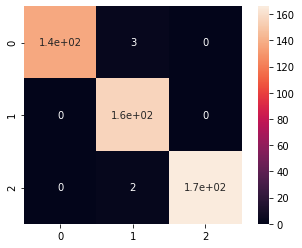

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction)
#print(cm)
sns.heatmap(cm, annot=True)

#Check results on a few select images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction = model.predict(input_img_features)[0] 
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])


In [ ]:
import pickle
pickle.dump(model, open("vgg16+xgb.dat", "wb"))